In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

In [ ]:
print(dataset.data)
print(dataset.target)
print(dataset.data.shape)

In [7]:
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
Y = dataset.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


# **FINDING THE BEST MAX. DEPTH VALUE**

Text(0, 0.5, 'score')

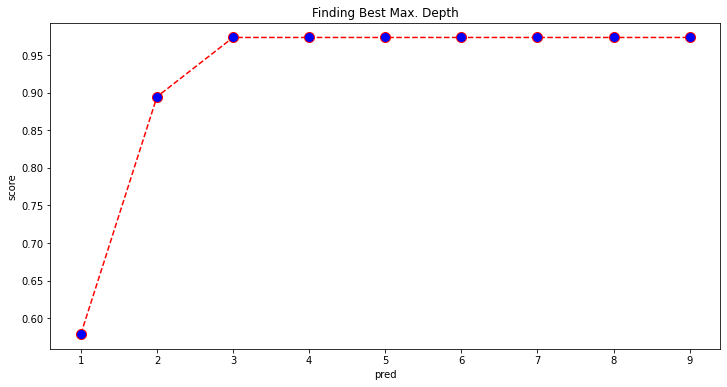

In [13]:
accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1,10):
  model = DecisionTreeClassifier(max_depth = i, random_state = 0)
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)
  score = accuracy_score(Y_test, pred)
  accuracy.append(score)

plt.figure(figsize = (12,6))
plt.plot(range(1,10), accuracy, color = 'red', linestyle = 'dashed', marker ='o', markerfacecolor = 'blue', markersize = 10)
plt.title('Finding Best Max. Depth')
plt.xlabel('pred')
plt.ylabel('score')

WE GET MAXIMUM ACCURACY OF 95% FOR i = 3.
SO, WE CHOOSE MAX_DEPTH =3

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]


In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy Of The Model {0}%".format(accuracy_score(Y_test,Y_pred)*100))

Accuracy Of The Model 97.36842105263158%
